<a href="https://colab.research.google.com/github/samuelajala01/CNN_classifier/blob/main/CNN_object_%20classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
%tensorflow_version 2.x
import tensorflow as tf

from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [25]:
# LOAD AND SPLIT DATASET
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

#NORMALIZE PIXEL VALUES TO BE BETWEEN 0 AND 1
train_images, test_images = train_images/255.0, test_images/255.0

class_names = ['airlane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

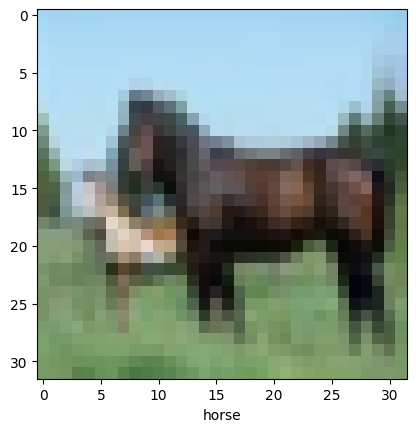

In [5]:
# LET'S LOOK AT ONE IMAGE

IMG_INDEX = 12

plt.imshow(train_images[IMG_INDEX], cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

### CNN architecture

In [6]:

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation=tf.keras.layers.LeakyReLU(alpha=0.1), input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation=tf.keras.layers.LeakyReLU(alpha=0.1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation=tf.keras.layers.LeakyReLU(alpha=0.1)))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 56320 

## ADDING DENSE LAYERS

In [8]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [10]:
## TRAINING THE MODEL
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 73s 46ms/step - loss: 1.4687 - accuracy: 0.4672 - val_loss: 1.2167 - val_accuracy: 0.5632
Epoch 2/10
1563/1563 [==============================] - 73s 47ms/step - loss: 1.0516 - accuracy: 0.6302 - val_loss: 0.9547 - val_accuracy: 0.6690
Epoch 3/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.8855 - accuracy: 0.6914 - val_loss: 0.8756 - val_accuracy: 0.7001
Epoch 4/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.7785 - accuracy: 0.7285 - val_loss: 0.8592 - val_accuracy: 0.7078
Epoch 5/10
1563/1563 [==============================] - 79s 51ms/step - loss: 0.6895 - accuracy: 0.7587 - val_loss: 0.8759 - val_accuracy: 0.7035
Epoch 6/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.6236 - accuracy: 0.7819 - val_loss: 0.8197 - val_accuracy: 0.7215
Epoch 7/10
1563/1563 [==============================] - 73s 46ms/step - loss: 0.5595 - accuracy: 0.8037 - val_loss: 0.8370 -

## Evaluating the Model

In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(test_acc)

313/313 - 4s - loss: 0.9186 - accuracy: 0.7240 - 4s/epoch - 12ms/step
0.7239999771118164


In [38]:

from google.colab import files
from PIL import Image
import numpy as np


def predict_uploaded_image(file_path):
    # Load and preprocess the uploaded image
    image = Image.open(file_path)
    input_shape = model.input_shape[1:3]
    resized_image = image.resize(input_shape)
    image_array = np.array(resized_image)
    normalized_image_array = image_array / 255.0
    input_image = np.expand_dims(normalized_image_array, axis=0)


    prediction = model.predict(input_image)

    predicted_classes = np.argmax(prediction, axis=1)

    return predicted_classes

uploaded = files.upload()

file_path = next(iter(uploaded))

predicted_classes = predict_uploaded_image(file_path)

# Print the predicted classes
for predicted_class in predicted_classes:
    print(f'Predicted class: {class_names[predicted_class]}')

Saving download.webp to download (2).webp
1/1 [==============================] - 0s 21ms/step
Predicted class: bird
